In [1]:
import numpy as np
from numpy.random import randint
from timing import timed, compare
import heapq

# Жадные алгоритмы

__Жадный алгоритм__ — алгоритм, заключающийся в принятии локально оптимальных решений на каждом этапе, допуская, что конечное решение также окажется оптимальным.

__Надёжный шаг.__ Существует оптимальное решение, согласованное с локальным жадным шагом. 

__Оптимальность подзадач.__ Задача, остающаяся после жадного шага, имеет тот же тип.

# Различные слагаемые
По данному числу $1 \le n \le 10^9$ найдите максимальное число $k$, для которого $n$ можно представить как сумму $k$ различных натуральных слагаемых. Выведите в первой строке число $k$, во второй — $k$ слагаемых.

__Решение:__ Надежным шагом является взятие самого минимального слагаемого, которое осталось из имеющихся (1, 2, 3 и т.д.). Если разность числа и слагаемого больше или равно нуля, добавляем слагаемое в список слагаемых, оставляем разность числа и слагаемого и продолжаем работать дальше, иначе добавляем само число в список слагаемых и останавливаем работу.

|n| term | n_new | terms|
|---|---|---|---|
|16|1|16 - 1 = 15|[1]| 
|15|2|15 - 2 = 13|[1, 2]| 
|13|3|13 - 3 = 10|[1, 2, 3]| 
|10|4|10 - 4 = 6|[1, 2, 3, 4]| 
|6|5|6 - 5 = 1|[1, 2, 3, 4, 5]| 
|1|6|1 - 5 = -4|[1, 2, 3, 4, 6]| 

## Объявление функций

In [2]:
def naive_term_count(num):
    assert num > 0
    acc = 1
    decision = []
    while True:
        num_new = num - acc
        acc_new = acc + 1
        if (num_new - acc_new >= 0):
            decision.append(acc)
            acc = acc_new
            num = num_new
        else:
            decision.append(num)
            break   
    return acc, decision

In [3]:
def term_count(num):
    assert num > 0
    k = int((-1 + (1 - 4 * -2 * num) ** 0.5) / 2)
    s = 0
    decision = []
    for i in range(1, k):
        decision.append(i)
        s += i
    decision.append(num - s)
    return k, decision

## Проверка

In [4]:
num = 16
term_count(num)

(5, [1, 2, 3, 4, 6])

In [5]:
num = 16
naive_term_count(num)

(5, [1, 2, 3, 4, 6])

## Сравнение

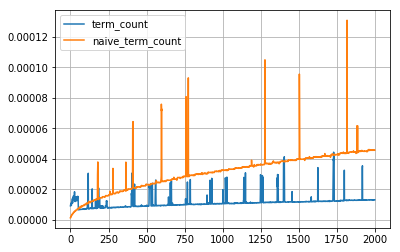

In [6]:
ar = np.arange(1, 2000, 1)
compare([term_count, naive_term_count], ar)